In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import datasets
from sklearn.cluster import KMeans


In [2]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [3]:
# Загрузили DF
carsDF = pd.read_csv("C:/Users/kazan/Desktop/carsdataset.csv")
carsDF = carsDF[['maker',
          'model',
          'mileage',
          'manufacture_year',
          'engine_displacement',
          'engine_power',
          'price_eur',
         'fuel_type']]
carsDF.dropna(inplace=True)

ohe = OneHotEncoder(sparse = False)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Исправили данные (выкинули лишнее)
carsDF['mileage'] = carsDF['mileage'].apply(lambda x: x*1.60934)
carsDF['price_rur'] = carsDF['price_eur'].apply(lambda x: x*69.3)
carsDF = carsDF.loc[carsDF['maker'] == "bmw"]

In [5]:
# Делим признаки на категориальные и числовые
trainDecimal = carsDF[['mileage','price_rur','engine_power','manufacture_year','engine_displacement']]
trainCategorical = carsDF[['manufacture_year','maker','model','engine_displacement','fuel_type']].astype(str)

trainCategoricalTransformed = MultiColumnLabelEncoder(columns = ['manufacture_year',
                                               'maker',
                                               'model',
                                               'engine_displacement',
                                               'fuel_type']).fit_transform(trainCategorical)

In [6]:
# Нормализация
scaler = Normalizer()
scaler.fit(trainDecimal)
trainDecimalTransformed = scaler.transform(trainDecimal)

ohe.fit(trainCategoricalTransformed)
trainTransformed = ohe.transform(trainCategoricalTransformed)
trainTransformed.shape
total =trainDecimalTransformed
#total = np.hstack((trainTransformed,trainDecimalTransformed))

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
total[:10]

array([[1.11989321e-01, 9.93706665e-01, 1.45291982e-04, 1.29665022e-03,
        1.93722643e-03],
       [9.27692033e-03, 9.99956615e-01, 4.13856181e-05, 5.95657288e-04,
        5.91223115e-04],
       [4.18130691e-01, 9.08376898e-01, 1.88956372e-04, 2.36785954e-03,
        3.53466514e-03],
       [7.03520527e-03, 9.99974888e-01, 4.48963299e-05, 4.75901097e-04,
        7.07235344e-04],
       [5.42780344e-01, 8.39865800e-01, 1.50149665e-04, 2.73818389e-03,
        2.72316893e-03],
       [9.07856381e-02, 9.95869059e-01, 8.32304072e-05, 9.29406213e-04,
        1.38393671e-03],
       [2.96982849e-03, 9.99995290e-01, 4.07035508e-05, 4.31671868e-04,
        6.41188040e-04],
       [3.36025562e-03, 9.99994059e-01, 6.75394776e-05, 4.29099394e-04,
        6.34700643e-04],
       [1.26116551e-02, 9.99920018e-01, 8.07163482e-05, 3.94569722e-04,
        8.61039686e-04],
       [3.58148351e-03, 9.99993379e-01, 4.98497711e-05, 3.58562282e-04,
        5.32858446e-04]])

In [ ]:
carsDF

In [ ]:
trainCategorical

In [25]:
trainDecimal

,mileage,price_rur,engine_power,manufacture_year,engine_displacement
89,173427.30642,1538859.861,225.0,2008.0,3000.0
499,31382.13000,3382670.907,140.0,2015.0,2000.0
780,354054.80000,769173.867,160.0,2005.0,2993.0
846,29772.79000,4231865.484,190.0,2014.0,2993.0
948,397642.16456,615287.673,110.0,2006.0,1995.0
...,...,...,...,...,...
3551466,0.00000,89767.062,170.0,2001.0,2979.0
3551559,217260.90000,89767.062,413.0,2010.0,4400.0
3551614,302555.92000,89767.062,87.0,2000.0,1895.0
3551619,450615.20000,89767.062,170.0,2006.0,3000.0


In [ ]:
trainCategoricalTransformed

In [24]:
trainDecimalTransformed

array([[1.11989321e-01, 9.93706665e-01, 1.45291982e-04, 1.29665022e-03,
        1.93722643e-03],
       [9.27692033e-03, 9.99956615e-01, 4.13856181e-05, 5.95657288e-04,
        5.91223115e-04],
       [4.18130691e-01, 9.08376898e-01, 1.88956372e-04, 2.36785954e-03,
        3.53466514e-03],
       ...,
       [9.58657164e-01, 2.84429526e-01, 2.75662011e-04, 6.33705772e-03,
        6.00436219e-03],
       [9.80699067e-01, 1.95365079e-01, 3.69980510e-04, 4.36577002e-03,
        6.52906782e-03],
       [9.83129341e-01, 1.82792599e-01, 3.25807877e-04, 2.51279325e-03,
        6.09464360e-03]])

In [ ]:
trainTransformed

In [ ]:
feature_names = ohe.get_feature_names()

In [ ]:
# Чтобы убедиться, что наша оценка работает правильно посмотрим на первый ряд закодированных данных.
row0 = trainTransformed[0]

In [ ]:
# Выведем имена Features для 1го объекта
feature_names[row0 == 1]

In [ ]:
ohe.inverse_transform([row0])

In [ ]:
# проверяем, что работает и обратно
hs_inv = ohe.inverse_transform(trainTransformed)

In [ ]:
total

In [14]:
# Обучаем и предсказываем
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(total)

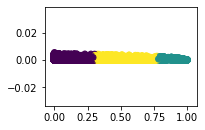

In [23]:
#Рисуем график как разбило по кластерам признак 0-го столбца по отношению ко N-му
plt.subplot(221)
plt.scatter(total[:, 0], total[:, 2], c=y_pred)
# 0- millage, 1 - price_rur, 2 - engine_power, 3 - manufacture_year, 4 - engine_displacement

In [22]:
y_pred[:100]

array([0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2])

In [ ]:
# Нужно слепить предсказания То есть carsDF[CarRang] = y_pred